In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mobile-price-classification/train.csv
/kaggle/input/mobile-price-classification/test.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/mobile-price-classification/train.csv")

In [3]:
test_data = pd.read_csv("/kaggle/input/mobile-price-classification/test.csv")

In [4]:
train_data.shape

(2000, 21)

In [5]:
test_data.shape

(1000, 21)

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
train_data.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [8]:
train_data.price_range.value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

In [9]:
train_data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [10]:
train_data.pc.unique()

array([ 2,  6,  9, 14,  7, 10,  0, 15,  1, 18, 17, 11, 16,  4, 20, 13,  3,
       19,  8,  5, 12])

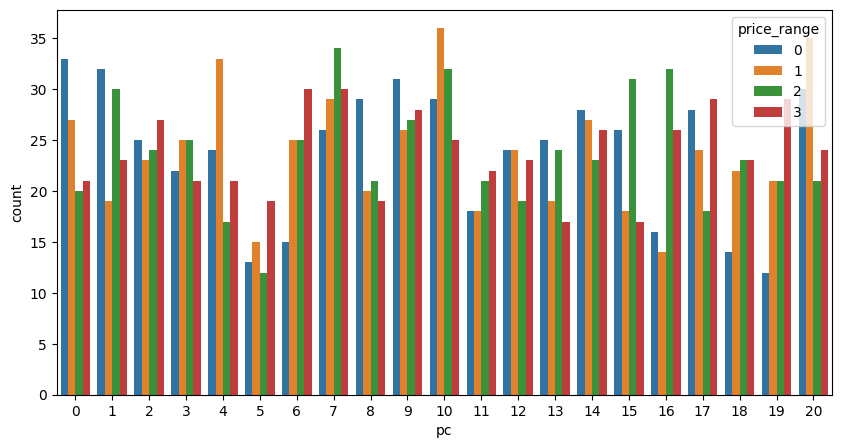

In [11]:
plt.figure(figsize = (10,5))
sns.countplot(data = train_data, x = 'pc', hue = 'price_range')
plt.show()

In [12]:
train_data.clock_speed.unique()

array([2.2, 0.5, 2.5, 1.2, 1.7, 0.6, 2.9, 2.8, 2.1, 1. , 0.9, 1.1, 2.6,
       1.4, 1.6, 2.7, 1.3, 2.3, 2. , 1.8, 3. , 1.5, 1.9, 2.4, 0.8, 0.7])

In [13]:
train_data.ram.unique()

array([2549, 2631, 2603, ..., 2032, 3057, 3919])

In [14]:
train_data.three_g.unique()

array([0, 1])

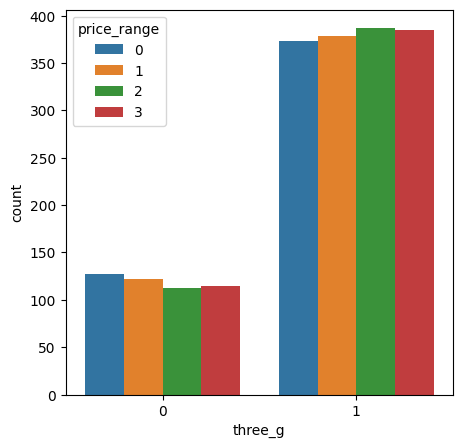

In [15]:
plt.figure(figsize = (5,5))
sns.countplot(data = train_data, x = 'three_g', hue = 'price_range')
plt.show()

In [16]:
train_data.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


<Axes: >

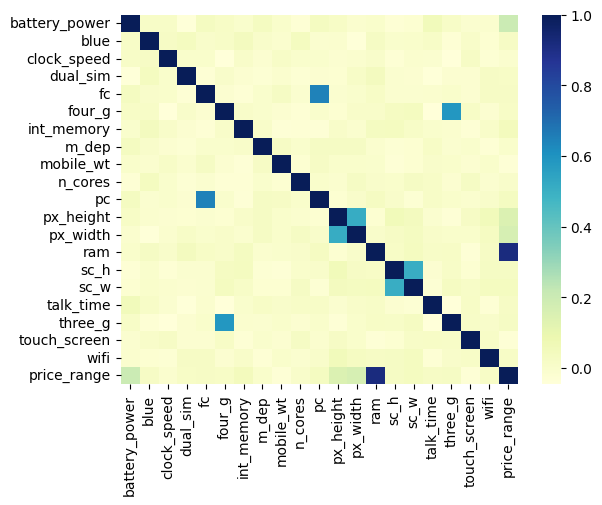

In [17]:
sns.heatmap(train_data.corr(), cmap="YlGnBu")

<Axes: xlabel='price_range', ylabel='ram'>

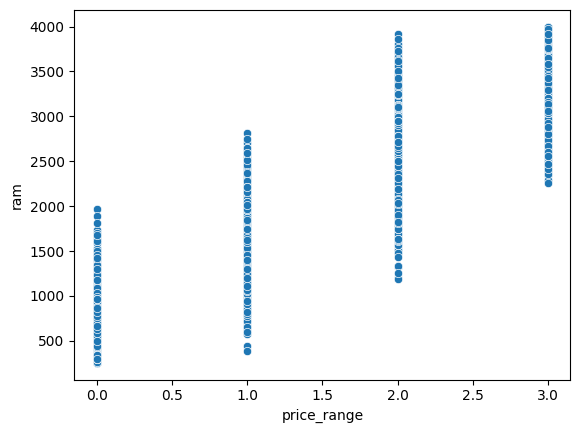

In [18]:
sns.scatterplot(data= train_data, x = 'price_range', y = 'ram')

In [19]:
train_data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [20]:
numerical_columns = ['battery_power',  'clock_speed',  'fc',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

In [21]:
train_data.clock_speed.unique()

array([2.2, 0.5, 2.5, 1.2, 1.7, 0.6, 2.9, 2.8, 2.1, 1. , 0.9, 1.1, 2.6,
       1.4, 1.6, 2.7, 1.3, 2.3, 2. , 1.8, 3. , 1.5, 1.9, 2.4, 0.8, 0.7])

In [22]:
def normalize(train_data, test_data, numerical_columns):
    
    max_ = train_data[numerical_columns].max()
    min_ = train_data[numerical_columns].min()
    train_data[numerical_columns] = (train_data[numerical_columns] - min_)/(max_ - min_)
    test_data[numerical_columns] = (test_data[numerical_columns] - min_)/(max_ - min_)
    return train_data, test_data

In [23]:
train_data, test_data = normalize(train_data, test_data, numerical_columns)

In [24]:
train_data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.492664,0.4950,0.408900,0.509500,0.226816,0.521500,0.484621,0.446389,0.502075,0.502929,...,0.329137,0.501679,0.499255,0.521893,0.320389,0.500611,0.761500,0.503000,0.507000,1.500000
std,0.293533,0.5001,0.326402,0.500035,0.228497,0.499662,0.292673,0.320462,0.294997,0.326834,...,0.226419,0.288518,0.289880,0.300946,0.242022,0.303553,0.426273,0.500116,0.500076,1.118314
min,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.234302,0.0000,0.080000,0.000000,0.052632,0.000000,0.225806,0.111111,0.241667,0.285714,...,0.144260,0.250167,0.254276,0.285714,0.111111,0.222222,1.000000,0.000000,0.000000,0.750000
50%,0.484302,0.0000,0.400000,1.000000,0.157895,1.000000,0.483871,0.444444,0.508333,0.428571,...,0.287755,0.498665,0.505211,0.500000,0.277778,0.500000,1.000000,1.000000,1.000000,1.500000
75%,0.744322,1.0000,0.680000,1.000000,0.368421,1.000000,0.741935,0.777778,0.750000,0.857143,...,0.483291,0.756342,0.750534,0.785714,0.500000,0.777778,1.000000,1.000000,1.000000,2.250000
max,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


<Axes: >

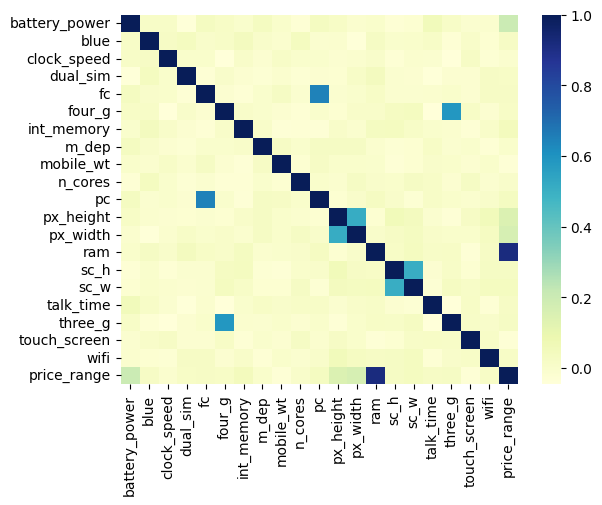

In [25]:
sns.heatmap(train_data.corr(), cmap="YlGnBu")

In [26]:
select_columns = []
for column in train_data.columns:
    corr, p_value = spearmanr(train_data['price_range'], train_data[column])
    print(f"{column} : {corr} - {p_value}")
    if p_value <= 0.1 and column != 'price_range':
        select_columns.append(column)

battery_power : 0.19999095450908858 - 1.7223057044179651e-19
blue : 0.02057285406141849 - 0.3577984898948863
clock_speed : -0.005436141356967046 - 0.8080352698801724
dual_sim : 0.017444479237224732 - 0.4355601630195083
fc : 0.024166831194135433 - 0.2800283622070244
four_g : 0.014771711417239406 - 0.5091036529765862
int_memory : 0.04427752850862638 - 0.04771653000554717
m_dep : -0.0003218393921890176 - 0.9885235466145562
mobile_wt : -0.030214005836468483 - 0.17679955873002617
n_cores : 0.004651406909122466 - 0.83531617148015
pc : 0.03282366022033268 - 0.1422682590465307
px_height : 0.13188410283565175 - 3.2150109040420085e-09
px_width : 0.1651336945326619 - 1.0740563666925509e-13
ram : 0.9170797841496084 - 0.0
sc_h : 0.023726584744656682 - 0.2888848842628786
sc_w : 0.024775829231710497 - 0.2680838379943398
talk_time : 0.022137565690070568 - 0.3224066623403745
three_g : 0.023611216880045027 - 0.29123661631673065
touch_screen : -0.030411071898217987 - 0.17399179859449332
wifi : 0.01878481

In [27]:
select_columns

['battery_power', 'int_memory', 'px_height', 'px_width', 'ram']

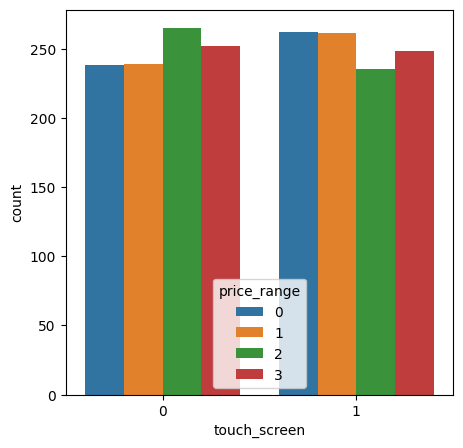

In [28]:
plt.figure(figsize = (5,5))
sns.countplot(data = train_data, x = 'touch_screen', hue = 'price_range')
plt.show()

In [29]:
X = train_data[select_columns]
Y = train_data['price_range']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.30, random_state=42)

In [31]:
model1 = LogisticRegression().fit(X_train, y_train)

In [32]:
predicted_train = model1.predict(X_train)
predicted_test = model1.predict(X_test)

In [33]:
model1.score(X_train, y_train)

0.935

In [34]:
model1.score(X_test, y_test)

0.9383333333333334

In [35]:
model2 = RandomForestRegressor(n_estimators=300).fit(X_train, y_train)

In [36]:
predicted_train = model2.predict(X_train)
predicted_test = model2.predict(X_test)

In [37]:
model2.score(X_train, y_train)

0.9921051408463986

In [38]:
model2.score(X_test, y_test)

0.9427853233030954